# Visualizing Genomic Regions of Pf7 Samples with IGV Plots

## Introduction

This notebook aims to demonstrate the visualization of genomic regions in Pf7 samples using the [igv-notebook library](https://github.com/igvteam/igv-notebook). `igv-notebook` facilitates the creation of Integrative Genomics Viewer (IGV) plots with the ability to access BAM files from the cloud without the need for downloads.

Pf7 bam and gvcf archive is publicly available at: https://pf7_release.cog.sanger.ac.uk/

We will start understanding igv plots and its setup. Then, we will show examples from impactful genes of *Plasmodium falciparum*.

**Each plot takes 30 seconds to generate, and this notebook takes 5 minutes to run. Generating all IGV plots simultaneously may lead to a runtime error; instead, generate them with at least a 30-second interval.**

### What is IGV Plot

IGV software, along with its Python library igv_notebook, has been developed by researchers at UC San Diego and the Broad Institute of MIT and Harvard. It is designed for the interactive visual exploration of genomic data and is freely available under the MIT open-source license.

IGV plot primarily showcases the alignment of sequencing reads to a reference genome. Here is a snapshot of a IGV plot:




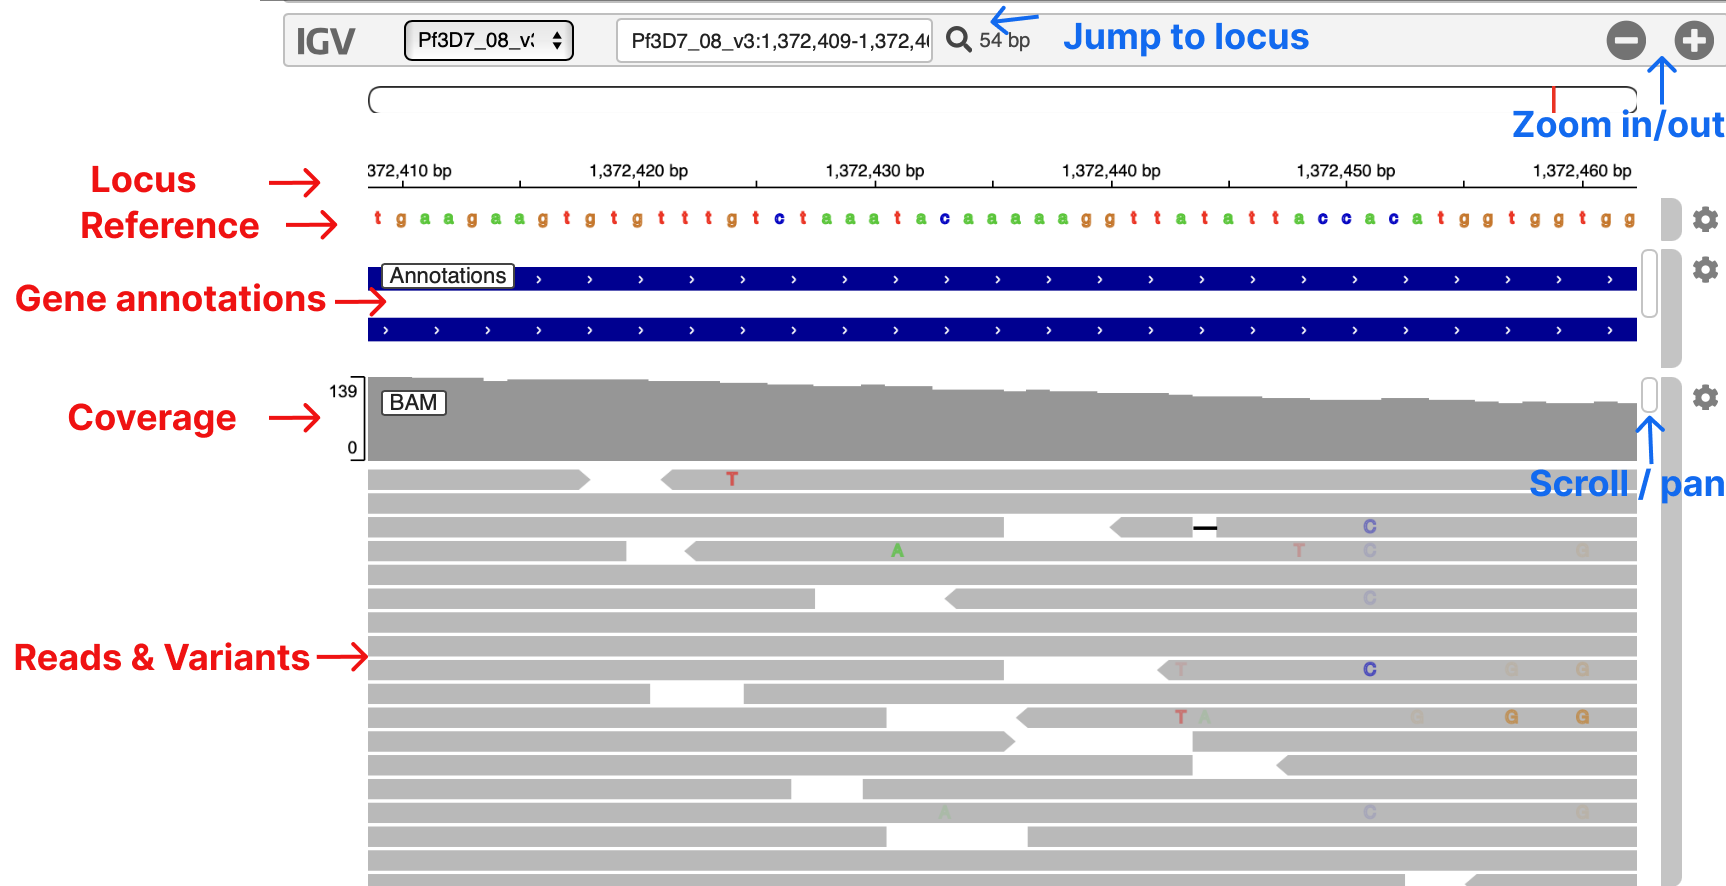

Let's go through what each track <font color="red">(red annotations in the picture)</font> shows:

**Reference:** This is the 3D7 reference strain sequence which will be used to identify variants in the reads track.

**Annotation:** This track will show which gene you are looking to.

**Coverage:**  This track will show you the number of reads covering that position, varied coverage patterns may signify regions of interest or potential structural variants.

**Reads & variants:** These are the sequencing reads output for a sample. Single nucleotide polymorphisms (SNPs) are highlighted, and deletions can be seen as empty.

Intereactive features of IGV plot <font color="blue">(blue texts in the picture)</font>, exploring with zooming, scrolling, locus specifiying features are essentialy useful viewing neighboring locations, .

Other resources related to basics of IGV plot:


- The IGV desktop application documentation offers valuable insights into IGV plots and interactive features, some of which are also applicable to igv-notebook: https://igv.org/doc/desktop/#UserGuide
- Matt Eldridge inspects variants in IGV to whether these are real events or artifacts: https://bioinformatics-core-shared-training.github.io/intro-to-IGV/InspectingVariantsInIGV.html

### Setup: Install igv-notebook

First of all, we need to install and import `igv_notebook` python package.

In [1]:
!pip install igv_notebook -q
import igv_notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


### Setup: Access to 3D7 Reference Annotation File

We will require 3D7 reference annotation file to annotate genes in the IGV plot, and we can download it using the `wget` command.

In [2]:
!wget ftp://ngs.sanger.ac.uk/production/malaria/Resource/34/Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff

# Define the path to the annotation file
annotation_path = '/content/Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff'

--2024-02-08 13:06:04--  ftp://ngs.sanger.ac.uk/production/malaria/Resource/34/Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff
           => ‘Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff’
Resolving ngs.sanger.ac.uk (ngs.sanger.ac.uk)... 193.62.203.221
Connecting to ngs.sanger.ac.uk (ngs.sanger.ac.uk)|193.62.203.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /production/malaria/Resource/34 ... done.
==> SIZE Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff ... 21035550
==> PASV ... done.    ==> RETR Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff ... done.
Length: 21035550 (20M) (unauthoritative)

Pfalciparum_replace 100%[===================>]  20.06M  14.9MB/s    in 1.4s    

2024-02-08 13:06:07 (14.9 MB/s) - ‘Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff’ saved [21035550]



Finally, we will require the 3D7 reference genome fasta file used for mapping of Pf7 samples, and it is available in the cloud:

In [3]:
# Define URL access to reference file
reference_url = 'https://storage.googleapis.com/pf7_release/reference/Pfalciparum.genome.fasta'

### Creation of IGV Plot using Pf7 Data

To initialise an IGV browser, we need to populate a configuration dictionary with essential file paths that will be utilized to load genomic data.

We also need to define a specific genomic location, identified by the chromosome ID, starting base coordinate, and ending base coordinate to allow the browser to commence at the desired genomic position.

We will create a function to streamline this process.

In [4]:
def sample_viewer(sample_id, chromosome, start_base_coordinate, end_base_coordinate):
  """
    Visualize genomic data using IGV_notebook.

    Parameters:
    - sample_id (str): Sample ID given in Pf7 for the sample.
    - chromosome (int): The chromosome number.
    - start_base_coordinate (int): The starting base coordinate for visualization.
    - end_base_coordinate (int): The ending base coordinate for visualization.

    Returns:
    - igv_plot: IGV Browser object for further interaction.
  """

  # Access to annotation file
  annotation_path = '/content/Pfalciparum_replace_Pf3D7_MIT_v3_with_Pf_M76611.gff'

  # Access to reference file
  reference_url = 'https://storage.googleapis.com/pf7_release/reference/Pfalciparum.genome.fasta'

  # Define the genomic locus formatted for igv-notebook
  locus = f'Pf3D7_{str(chromosome).zfill(2)}_v3:{start_base_coordinate:,}-{end_base_coordinate:,}'
  print(f'Visualizing chromosome {chromosome} for genomic locus: {locus}')

  # Initialize the browser
  igv_notebook.init()
  igv_plot = igv_notebook.Browser(

    {
        "locus": locus,
            "tracks": [

            {
                "name": "Annotations",
                "path": annotation_path,
                "indexed": False,
                "type": "annotation",
                "format": "gff"
            },
            {
                "name": "BAM",
                "url": f"https://pf7_release.cog.sanger.ac.uk/bam/{sample_id}.bam",
                "indexURL": f"https://pf7_release.cog.sanger.ac.uk/bam/{sample_id}.bam.bai",
                "format": "bam",
                "type": "alignment"
            },
        ],

        # Load the reference
        "reference": {
           "fastaURL": reference_url,
           "indexed": False, # reads entire fasta
        },
    })
  return igv_plot

We are ready to use our function to show examples from Pf7 on some impactful events.

## Examples from Pf7

### HRP2 deletions

*hrp2* and *hrp3* are genes located in subtelomeric regions of the genome with very high levels of natural variation. Deletion in those genes can cause failure of rapid diagnostic tests and is therefore important to monitor.

We will specify the sample and navigate to a genomic location where hrp2 deletion is expected.

**NOTE: The IGV plot takes 30 seconds to fully load.**

In [5]:
sample_viewer('PP0026-C', 8, 1374970, 1375040)

Visualizing chromosome 8 for genomic locus: Pf3D7_08_v3:1,374,970-1,375,040


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

From this view, we can see that all the reads are deleted from position 1,374,987 bp onwards (scroll to see the other reads).

Let's zoom out a bit to have a clear view by defining a larger range that includes the deletion locus. The breakpoint will be seen before 1,374,850 bp and after 1,374,950 bp.

In [6]:
sample_viewer('PP0026-C', 8, 1373212, 1376988)

Visualizing chromosome 8 for genomic locus: Pf3D7_08_v3:1,373,212-1,376,988


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### HRP3 deletions


Let's look at a different example of a deletion, in this case we can view breakpoints around HRP3, where chromosome 13 has recombined with chromosome 11. Note how the reads in this section of the chromosome have "dissapeared" within the two breakpoints.

The first is just to the right of ~2,807kb and the second at ~2,846kb (scroll right to see this).

You can see how the gene ID annotation for HRP3, PF3D7_1372200, falls within this deleted region.

In [17]:
sample_viewer('PD0129-C', 13, 2806000, 2826000)

Visualizing chromosome 13 for genomic locus: Pf3D7_13_v3:2,806,000-2,826,000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MDR1 Duplication

Duplication of the MDR1 gene can lead to resistance to antimalarial drugs, including artemisinin-based combination therapies (ACTs).

Before looking at a Pf7 sample for MDR1 duplication, let's discuss what we expect to see in the IGV plot:

- IGV uses color coding to flag anomalous insert sizes. Red flags are inferred for an insert size that is larger than expected (possible indication of a deletion).

- Read orientation of paired reads is normally expected as left versus right,and right to left orientation implies duplication or translocation with respect to reference.  

- When a large section of DNA is duplicated and inserted into the genome next to the original sequence, it will be shown as below.

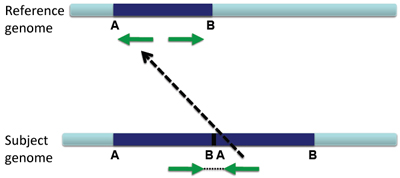

_Figure credit: https://igv.org/doc/desktop/#UserGuide/tracks/alignments/paired_end_alignments/%23tandem-duplication_

In concordance with the knowledge above, we will be able to observe reads highlighted in red, indicating a right-to-left orientation in the MRD1 gene locus within the range of 958kb to 962kb. The coverage (1940) is notably high, although it does not present as a distinct peak when compared with other regions of the genome.

In [ ]:
sample_viewer('PG0611-C', 5, 955955, 963095)

Visualizing chromosome 5 for genomic locus: Pf3D7_05_v3:955,955-963,095


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Plasmepsin 2/3 Duplication

Duplication of the Plasmepsin 2/3 gene can lead to resistance to piperaquine, a partner drug used in artemisinin-based combination therapies (ACTs).

We will showcase two samples from Pf7 where we observed a duplication event. In addition to the red reads (insertions) with orientations right versus left, there are numerous left versus right reads indicating an insertion into the genome, marked in green at the genomic location of 298-299 kb.

Also note that the coverage of Plasmepsin 2/3 gene (3892) is 2-5 times more than the neighbour genes.

In [ ]:
sample_viewer('PG0607-C', 14, 295000, 302000)

Visualizing chromosome 14 for genomic locus: Pf3D7_14_v3:295,000-302,000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's look at the duplication at the second sample in genomic locus close to 299kb.

In [ ]:
sample_viewer('PG0609-C', 14, 293000, 300000)

Visualizing chromosome 14 for genomic locus: Pf3D7_14_v3:293,000-300,000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Along with these insertions, we can also see from the plots that there are breakpoints close to MDR1. We will zoom into sample 1 and sample 2 to note the starting position of the breakpoint.

The breakpoint in the first sample starts around 297,350bp.

In [ ]:
sample_viewer('PG0607-C', 14, 297200, 299000)

Visualizing chromosome 14 for genomic locus: Pf3D7_14_v3:297,200-299,000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The breakpoint in the second sample starts around 297,300bp, 60 base pairs behind from the first sample.

In [ ]:
sample_viewer('PG0609-C', 14, 297200, 299000)

Visualizing chromosome 14 for genomic locus: Pf3D7_14_v3:297,200-299,000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### CRT 72-76 Haplotype

In the last example, we will look at a CRT 72-76 haplotype, which is a genetic marker associated with resistance to chloroquine, an antimalarial drug. The haplotype is a combination of amino acid residues at positions 72 to 76 in the _P. falciparum_ chloroquine-resistance transporter (pfcrt) gene.

In the IGV plot genomic locations 403,620-403,625 bp, we can see some reads with no SNPs and other reads with the following 4 SNPs which makes CVIET haplotype: 403620 G>T, 403621 A>G, 403624 T>A, 403625 A>C.

In [ ]:
sample_viewer('FP0025-C', 7, 403600, 403650)

Visualizing chromosome 7 for genomic locus: Pf3D7_07_v3:403,600-403,650


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Side note:** Although CVIET is indeed caused by 4 SNPs, this haplotype is represented by GATK as two 1bp indels (at 403618 and 403622) and the SNP at 403625. See final paragraph of "Recommendations regarding sets of variants to use in analyses" section in [Pf7 README](https://www.malariagen.net/resource/34) for a bit more info.

## Conclusion



In summary, you can visualise any part of the aligned reads of Pf7 genome, by simply specifying sample ID, gene, and locus information to the `sample_viewer` function in this notebook.

